# Getting Familiar with Pandas pt  2

## Scikit-learn, Dummies, Duplicates & Functions

### Charity Miller


### How to make pandas DataFrame smaller and faster

In [1]:
import pandas as pd

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

#### How to find out the memory of the data

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       193 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


In [5]:
drinks.memory_usage()

Index                            128
country                         1544
beer_servings                   1544
spirit_servings                 1544
wine_servings                   1544
total_litres_of_pure_alcohol    1544
continent                       1544
dtype: int64

In [6]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                       12332
dtype: int64

In [7]:
drinks.memory_usage(deep=True).sum()

31224

#### How to make decrease the size of the data frame

In [8]:
sorted(drinks.continent.unique())

['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [9]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [11]:
drinks['continent'] = drinks.continent.astype('category')

In [12]:
drinks.dtypes

country                           object
beer_servings                      int64
spirit_servings                    int64
wine_servings                      int64
total_litres_of_pure_alcohol     float64
continent                       category
dtype: object

In [13]:
drinks.continent.head()

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: category
Categories (6, object): [Africa, Asia, Europe, North America, Oceania, South America]

In [14]:
drinks.continent.cat.codes.head()

0    1
1    2
2    0
3    2
4    0
dtype: int8

In [15]:
drinks.memory_usage(deep=True)

Index                             128
country                         12588
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [17]:
drinks['country']=drinks.country.astype('category')

In [18]:
drinks.memory_usage(deep=True)

Index                             128
country                         18094
beer_servings                    1544
spirit_servings                  1544
wine_servings                    1544
total_litres_of_pure_alcohol     1544
continent                         744
dtype: int64

In [19]:
drinks.country.cat.categories

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Arab Emirates', 'United Kingdom', 'Uruguay', 'Uzbekistan',
       'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)

In [23]:
df = pd.DataFrame({'ID': [100, 101, 102, 103], 'quality': ['good', 'very good', 'good', 'excellent']})

In [24]:
df

,ID,quality
0,100,good
1,101,very good
2,102,good
3,103,excellent


In [25]:
df.sort_values('quality')

,ID,quality
3,103,excellent
0,100,good
2,102,good
1,101,very good


In [45]:
from pandas.api.types import CategoricalDtype

In [50]:
# Code has error 'ValueError: Got an unexpected argument: categories' Will not run
cat = ['good', 'very good', 'excellent']
df['quality'] = df.quality.astype(CategoricalDtype(categories = cat, ordered=True))

In [51]:
df.quality

0         good
1    very good
2         good
3    excellent
Name: quality, dtype: category
Categories (3, object): [good < very good < excellent]

In [52]:
df.sort_values('quality')

,ID,quality
0,100,good
2,102,good
1,101,very good
3,103,excellent


In [53]:
# using boolean, we can get all columns where the row > good
df.loc[df.quality > 'good', :]

,ID,quality
1,101,very good
3,103,excellent


### How to use pandas with scikit-learn to create Kaggle submissions

In [54]:
import pandas as pd

In [55]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
feature_cols = ['Pclass', 'Parch']

In [62]:
x = train.loc[:, feature_cols]

In [63]:
x.shape

(891, 2)

In [65]:
y = train.Survived

In [67]:
y.shape

(891,)

#### Creating a classification model

In [69]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x,y)

C:\Users\16824\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
test = pd.read_csv('http://bit.ly/kaggletrain')

In [72]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
x_new = test.loc[:,feature_cols]

In [75]:
x_new.shape

(891, 2)

In [78]:
new_pred_class = logreg.predict(x_new)

In [79]:
new_pred_class

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [85]:
pd.DataFrame(({'PassengerId':test.PassengerId, 'Survived':new_pred_class})).set_index('PassengerId').to_csv('sub.csv')

In [86]:
train.to_pickle('train.pkl')

In [87]:
pd.read_pickle('train.pkl')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Exploring Datasets with Pandas

In [88]:
import pandas as pd

In [90]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [91]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [92]:
pd.isnull(ufo).head()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False


In [93]:
ufo.loc[0:4, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [94]:
ufo.iloc[0:4, :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00


In [95]:
ufo.values[0:4, :]

array([['Ithaca', nan, 'TRIANGLE', 'NY', '6/1/1930 22:00'],
       ['Willingboro', nan, 'OTHER', 'NJ', '6/30/1930 20:00'],
       ['Holyoke', nan, 'OVAL', 'CO', '2/15/1931 14:00'],
       ['Abilene', nan, 'DISK', 'KS', '6/1/1931 13:00']], dtype=object)

In [96]:
list(range(0,4))

[0, 1, 2, 3]

In [97]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [98]:
ufo.loc[:, 'City':'State']

,City,Colors Reported,Shape Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY
...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL
18237,Spirit Lake,NaN,DISK,IA
18238,Eagle River,NaN,NaN,WI
18239,Eagle River,RED,LIGHT,WI


#### Random Sampling

In [99]:
ufo.sample(n=3)

,City,Colors Reported,Shape Reported,State,Time
11854,Tukwila,NaN,LIGHT,WA,7/17/1998 22:00
14770,Bel Air,NaN,TRIANGLE,MD,10/8/1999 21:30
14271,Barstow,NaN,VARIOUS,CA,8/20/1999 1:00


In [101]:
#Sample with n=number
ufo.sample(n=3, random_state=42)

,City,Colors Reported,Shape Reported,State,Time
217,Norridgewock,NaN,DISK,ME,9/15/1952 14:00
12282,Ipava,NaN,TRIANGLE,IL,10/1/1998 21:15
17933,Ellinwood,NaN,FIREBALL,KS,11/13/2000 22:00


In [102]:
#Sample with frac= fraction
train = ufo.sample(frac=0.75, random_state=99)

In [108]:
train.shape

(13681, 5)

In [103]:
#How to pull the remaining samples after sampling part of the series
test = ufo.loc[~ufo.index.isin(train.index), :]

In [106]:
test.shape

(4560, 5)

### How to create dummy variables in pandas

Dummy Variables (indicator variables) - Using dummy coding would mean to give variables a set variable 

Example: Male = 1 , Female = 2

In [131]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [132]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
#How to drop the columns and replace them with attributes filled with dummy variables
#Use drop_first=True to drop unnecessary dummy variable columns
pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0


In [115]:
#This code allows format allows you to create a column within a data set that assigns each characteristic an attribute of male or female
train['Sex_male'] = train.Sex.map({'female':0, 'male':1})

In [114]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [116]:
#An easier way to create dummy variables
pd.get_dummies(train.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


We can drop the unneeded columns from the get_dummies data. This is because there are only 2 variables and having once column defines the meaning of the variables clearly. 


In [120]:
#Prefix adds the title
pd.get_dummies(train.Sex, prefix = 'Sex').iloc[:, 1:]

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [122]:
#Find the different types of variable in the dataframe
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [124]:
#Pull the data for the variables in the attributes, each 1 represents the 'truth' for that row.
pd.get_dummies(train.Embarked, prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [127]:
#Given the previous table, how can we apply the dummy variables in 1 column?
embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'Embarked').iloc[:,1:]

In [130]:
#How to include the Embarked data into the dataframe
pd.concat([train,embarked_dummies], axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1


### How to work with dates and times in pandas

In [135]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [136]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [137]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [138]:
ufo['Time'] = pd.to_datetime(ufo.Time)

In [139]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [140]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [142]:
#You can pull information on the times with the df.Time.dt function
#Pull Hours
ufo.Time.dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [144]:
#Search for attributes on pandas API references
ufo.Time.dt.weekday_name

0         Sunday
1         Monday
2         Sunday
3         Monday
4        Tuesday
          ...   
18236     Sunday
18237     Sunday
18238     Sunday
18239     Sunday
18240     Sunday
Name: Time, Length: 18241, dtype: object

In [146]:
ts = pd.to_datetime('1/1/1999')

In [148]:
#View specific dates and times 
ufo.loc[ufo.Time >=ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [151]:
#Use time to do math with time
ufo.Time.max() - ufo.Time.min()

Timedelta('25781 days 01:59:00')

In [152]:
#Plot by year
%matplotlib inline

In [153]:
ufo['Year'] = ufo.Time.dt.year

In [154]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [156]:
#using .sort_index() allows you to sort by year since the years are the index/primary keys
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
        ... 
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
Name: Year, Length: 68, dtype: int64

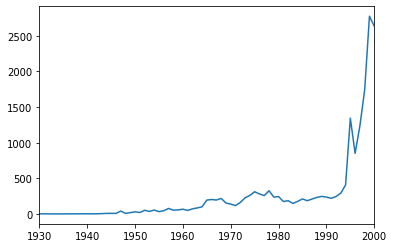

In [158]:
ufo.Year.value_counts().sort_index().plot()

### How to find and remove duplicate rows in pandas

In [162]:
user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_table('http://bit.ly/movieusers', sep= '|', header=None, names=user_cols, index_col = 'user_id')

In [164]:
users.shape

(943, 4)

In [165]:
#Code returns True if the value has been entered in a previous row. 
users.zip_code.duplicated()

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [167]:
#True = 1, False = 0 adds up Trues to get 148
users.zip_code.duplicated().sum()

148

In [171]:
users.duplicated().sum()

7

In [172]:
#How to call the 7 rows that are duplicates
users.loc[users.duplicated(), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [175]:
#keep the original rows
users.loc[users.duplicated(keep='first'), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [177]:
#Keep the second set of rows (duplicate rows) instead of the originals
users.loc[users.duplicated(keep='last'), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [178]:
#Keep all of the rows
users.loc[users.duplicated(keep= False), :]

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [180]:
#Drop duplicates from the dataframe
users.drop_duplicates(keep='first').shape

(936, 4)

In [183]:
#Identify duplicates by different columns
#Example of age and zip code
users.drop_duplicates(subset=['age', 'zip_code']).shape

(927, 4)

### How to avoid a SettingWithCopyWarning in pandas

In [184]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [185]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [186]:
#look for missing values
movies.content_rating.isnull().sum()

3

In [188]:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [189]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [190]:
movies[movies.content_rating=='NOT RATED'].content_rating

5      NOT RATED
6      NOT RATED
41     NOT RATED
63     NOT RATED
66     NOT RATED
         ...    
665    NOT RATED
673    NOT RATED
763    NOT RATED
827    NOT RATED
899    NOT RATED
Name: content_rating, Length: 65, dtype: object

In [191]:
import numpy as np

In [192]:
movies[movies.content_rating=='NOT RATED'].content_rating=np.nan

C:\Users\16824\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [195]:
#Code did not work due to warning until the .loc code is ran
movies.content_rating.isnull().sum()

68

In [196]:
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [197]:
top_movies = movies.loc[movies.star_rating >=9, :]

In [198]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


In [199]:
top_movies.loc[0,'duration']=150

C:\Users\16824\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [200]:
top_movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,150,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."


### How to change display options in pandas

In [201]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [204]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [209]:
#How to show all rows in data frame
pd.set_option('display.max_rows', None)

In [211]:
#reset view
pd.reset_option('display.max_rows', None)

In [212]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [213]:
#Show all columns in data set
pd.set_option('display.max_columns', None)

In [214]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [215]:
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
pd.get_option('display.max_colwidth', 1000)

50

In [219]:
#Display all characters in dataset (can't use 'None' with this code)
pd.set_option('display.max_colwidth', 1000)

In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [222]:
#Change the number of decimals you want to show
pd.set_option('display.precision', 2)

In [224]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [225]:
drinks['x'] = drinks.wine_servings * 1000

In [226]:
drinks['y'] = drinks.total_litres_of_pure_alcohol * 1000

In [228]:
#How do we input commas in the variable numbers? 
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,4900.0
2,Algeria,25,0,14,0.7,Africa,14000,700.0
3,Andorra,245,138,312,12.4,Europe,312000,12400.0
4,Angola,217,57,45,5.9,Africa,45000,5900.0


In [229]:
#To input commas use
pd.set_option('display.float_format', '{:,}'.format)

In [230]:
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,x,y
0,Afghanistan,0,0,0,0.0,Asia,0,0.0
1,Albania,89,132,54,4.9,Europe,54000,"4,900.0"
2,Algeria,25,0,14,0.7,Africa,14000,700.0


In [234]:
#Name options in pandas with descriptions
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]display.column_space No description available.
    [default: 12] [currently: 12]display.date_dayfirst : boolean
    When True, prints and parses dates with the day first, eg 20/01/2005
    [default: False] [currently: False]display.date_yearfirst : bool

In [236]:
#Search options in pandas
pd.describe_option('rows')

display.max_info_rows : int or None
    df.info() will usually show null-counts for each column.
    For large frames this can be quite slow. max_info_rows and max_info_cols
    limit this null check only to frames with smaller dimensions than
    specified.
    [default: 1690785] [currently: 1690785]display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]display.min_rows : int
    The numbers of rows to show in a truncated view (wh

In [237]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



C:\Users\16824\Anaconda3\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


### How to create a pandas DataFrame from another object

In [238]:
#Create a data frame (simplified)
pd.DataFrame({'id':[100,101,102], 'color':['red', 'blue', 'red']})

,id,color
0,100,red
1,101,blue
2,102,red


In [242]:
#How to change the order of columns. Also, how to assign index.
df = pd.DataFrame({'id':[100,101,102], 'color':['red', 'blue', 'red']}, columns = ['color', 'id'], index = ['a', 'b', 'c'])

In [243]:
df

,color,id
a,red,100
b,blue,101
c,red,102


In [247]:
#Alternate method
pd.DataFrame([[100,'red'], [101,'blue'], [102,'red']], columns = ['color', 'id'], index = ['a', 'b', 'c'])

,color,id
a,100,red
b,101,blue
c,102,red


In [248]:
#Convert numpy array to data frame

In [250]:
arr = np.random.rand(4,2)
arr

array([[0.6736755 , 0.79835085],
       [0.15840847, 0.87428162],
       [0.49443525, 0.73833026],
       [0.9999146 , 0.56388092]])

In [254]:
pd.DataFrame(arr, columns = ['one','two'])

,one,two
0,0.673676,0.798351
1,0.158408,0.874282
2,0.494435,0.738330
3,0.999915,0.563881


In [255]:
#Create data frame with random integers. 
pd.DataFrame({'student':np.arange(100,110,1), 'test':np.random.randint(60,101,10)})

,student,test
0,100,65
1,101,61
2,102,81
3,103,65
4,104,65
5,105,78
6,106,92
7,107,98
8,108,91
9,109,97


In [256]:
#Apply index
pd.DataFrame({'student':np.arange(100,110,1), 'test':np.random.randint(60,101,10)}).set_index('student')

,test
student,
100,79
101,77
102,79
103,76
104,94
105,94
106,69
107,81
108,81


In [262]:
#Apply new series to existing data frame
s = pd.Series(['round','square'], index=['c', 'b'], name='shape')

In [263]:
pd.concat([df,s], axis=1)

C:\Users\16824\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,color,id,shape
a,red,100,NaN
b,blue,101,square
c,red,102,round


### How to apply a function to a pandas Series or DataFrame

In [265]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [267]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [268]:
train['Sex_num'] = train.Sex.map({'female':0, 'male':1})

In [270]:
train.loc[0:4, ['Sex', 'Sex_num']]

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [271]:
train['Name_length'] = train.Name.apply(len)

In [272]:
train.loc[0:4, ['Name', 'Name_length']]

,Name,Name_length
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",44
4,"Allen, Mr. William Henry",24


In [273]:
train['Fare_ceil'] = train.Fare.apply(np.ceil)

In [274]:
train.loc[0:4, ['Fare', 'Fare_ceil']]

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [275]:
train.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [276]:
def get_element (my_list, position):
    return my_list[position]

In [277]:
train.Name.str.split(',').head().apply(get_element, position=0).head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Name, dtype: object

Summary: The .apply() method applies functions to either rows or columns 

In [278]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [281]:
#Max value of each column (axis 0)
drinks.loc[:, 'beer_servings' : 'wine_servings'].apply(max, axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [282]:
#Max value of each row (axis 1)
drinks.loc[:, 'beer_servings' : 'wine_servings'].apply(max, axis=1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [285]:
#How to see which column has the greatest value on each row
drinks.loc[:, 'beer_servings': 'wine_servings'].apply(np.argmax, axis = 1)

0        beer_servings
1      spirit_servings
2        beer_servings
3        wine_servings
4        beer_servings
            ...       
188      beer_servings
189      beer_servings
190      beer_servings
191      beer_servings
192      beer_servings
Length: 193, dtype: object

In [289]:
#Apply function to EVERY element of a DataFrame
#Example: passing each number through the float function with .applymap(float)
drinks.loc[:, 'beer_servings': 'wine_servings'] = drinks.loc[:, 'beer_servings': 'wine_servings'].applymap(float)

In [290]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa
